<a href="https://colab.research.google.com/github/KrsNovita2717/FaceExpressionDetection/blob/main/ExpressionRecognitionImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
# import dependencies
import cv2
import os, gdown
import numpy as np
from keras.models import load_model
from google.colab import files
import matplotlib.pyplot as plt

In [20]:
# Unduh model
url = 'https://drive.google.com/uc?id=1BuVp5Te1vKMV062dJANtgf2o1ob7exZ4'
output = 'FaceExpressionDetection.h5'

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1BuVp5Te1vKMV062dJANtgf2o1ob7exZ4
From (redirected): https://drive.google.com/uc?id=1BuVp5Te1vKMV062dJANtgf2o1ob7exZ4&confirm=t&uuid=560c6bac-7294-4a5c-a50e-ca409280f284
To: /content/FaceExpressionDetection.h5
100%|██████████| 404M/404M [00:04<00:00, 96.8MB/s]


'FaceExpressionDetection.h5'

In [21]:
# Memuat model untuk pengenalan ekspresi wajah
model = load_model('FaceExpressionDetection.h5')

In [24]:
# Kamus korespondensi label kelas dan nama folder
label_to_class = {0: "angry", 1: "disgust", 2: "fear", 3: "happy", 4: "neutral", 5: "sad", 6: "surprise"}

Saving images.jpeg to images (1).jpeg
1/1 [==============================] - 0s 74ms/step
Hasil prediksi: surprise


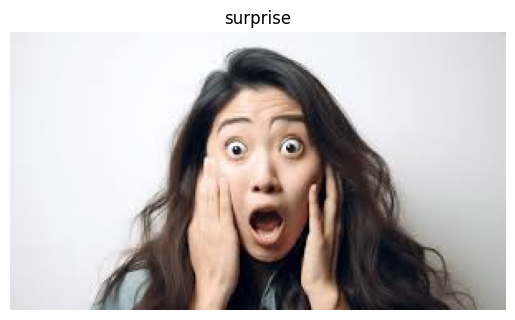

In [25]:
# Unggah gambar untuk pengujian
uploaded = files.upload()

for filename in uploaded.keys():
    path = '/content/' + filename
    img = cv2.imread(path, 0)
    img = cv2.resize(img, (48, 48))
    img = np.array(img, 'float32') / 255.0
    img = img.reshape(1, 48, 48, 1)
    prediction = model.predict(img)
    label = np.argmax(prediction)
    predicted_class = label_to_class[label]
    print("Hasil prediksi:", predicted_class)

    # Tampilkan gambar
    plt.imshow(cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB))
    plt.title(predicted_class)
    plt.axis('off')
    plt.show()